In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle
import sys
current_dir = %pwd

# Sarsa Shaping
We try several different configurations of parameters to probe the param space
- default
- halved lowest enemy penalty
- double shield bonus
    
Each for 3 trials.

In [5]:
results_dir = current_dir + '/../results'
num_exps = 3
# 3 trials of 3000 episodes
numtrials = 3
numep = 3000

steps = np.zeros((num_exps, numtrials, numep))
rewards = np.zeros((num_exps, numtrials, numep))

for exp_idx in range(num_exps):
    for trial in range(numtrials):
        with open(results_dir + '/shaping_{}/results/shaping_{}.log'.format(
                                exp_idx+1, trial+1)) as f:
            log = pickle.load(f)
            steps[exp_idx,trial,:] = np.array(log['steps'])
            rewards[exp_idx,trial,:] = np.array(log['reward'])

Calculate basic statistics of number of steps over different trials

In [6]:
from scipy import stats
mean_steps = np.mean(steps,axis=1) #average steps
print mean_steps.shape
err = stats.sem(steps,axis=1) #standard error of mean
print "An average of %s steps" % str(np.mean(mean_steps))

#statistics for first 500 episodes
mean_500 = np.mean(steps[:500:],axis=1)
err_500 = stats.sem(steps[:500:],axis=1) #standard error of mean 

(3, 3000)
An average of 75.3061481481 steps



Plot learning curves with 95% confidence (t_dist standard error Note: this assumes normal distribution of means, probably not true here)

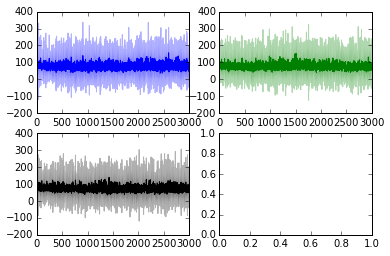

In [18]:
plt.figure(figsize=(12,8))

confidence = 0.95
#factor for given confidence and number of trials
t = stats.t._ppf((1+confidence)/2., numtrials-1)

f, ((ax1, ax2), (ax3, _)) = plt.subplots(2, 2)
axes = [ax1, ax2, ax3]
colors = ['blue', 'green', 'black']
for exp_idx in range(num_exps):
    ax = axes[exp_idx]
    ax.plot(mean_steps[exp_idx], color=colors[exp_idx])
    ax.fill_between(np.arange(numep),(mean_steps[exp_idx]-t*err[exp_idx]),(mean_steps[exp_idx]+t*err[exp_idx]),alpha=0.3,color=colors[exp_idx])

    #plt.xlabel('episode')
    #plt.ylabel('#steps')
    #plt.ylim((0,np.max(mean_steps+t*err)))
    #plt.title('Learning curve averaged over {} trials'.format(numtrials))

In [20]:
from scipy.signal import gaussian
from scipy.ndimage import filters

#gaussian filter (running average but closer points have higher weights)
def smoothing(x,window,axis=0):
    filt = gaussian(window,2.)
    return filters.convolve1d(x,filt/np.sum(filt),axis)

#standard running average
def running_average(x,window,axis=0):
    return filters.convolve1d(x,np.ones(window),axis)

NameError: name 'color' is not defined

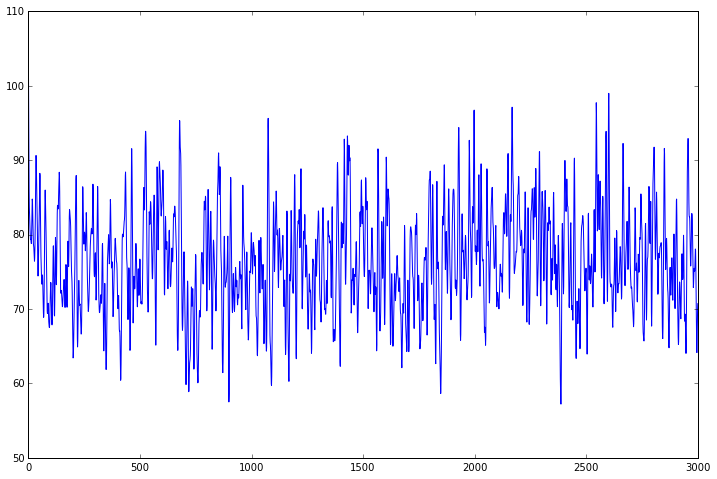

In [21]:
mean_sm = smoothing(mean_steps[0], 100, 0)
err_sm = smoothing(err[0], 100, 0)

plt.figure(figsize=(12,8))
plt.plot(mean_sm)
plt.fill_between(np.arange(numep),(mean_sm-t*err_sm),(mean_sm+t*err_sm),alpha=0.3,color=color)

plt.ylabel('#steps')
plt.xlabel('episodes')


## Reward Analysis

[ 233.54156679  214.79323821  151.75093144  166.81005611  222.06221913
  199.68158442  205.60270947  166.41232079  168.88522143  188.42756806]
[ 233.11219478  206.31314103  143.80754927  168.74223015  229.03951428
  200.32564243  198.84010033  164.69483276  165.55758836  190.4670851 ]
[ 232.91686642  202.08019025  139.83147046  169.71322111  232.5422284
  200.63683116  195.46124773  163.84202508  163.8962238   191.47819721]


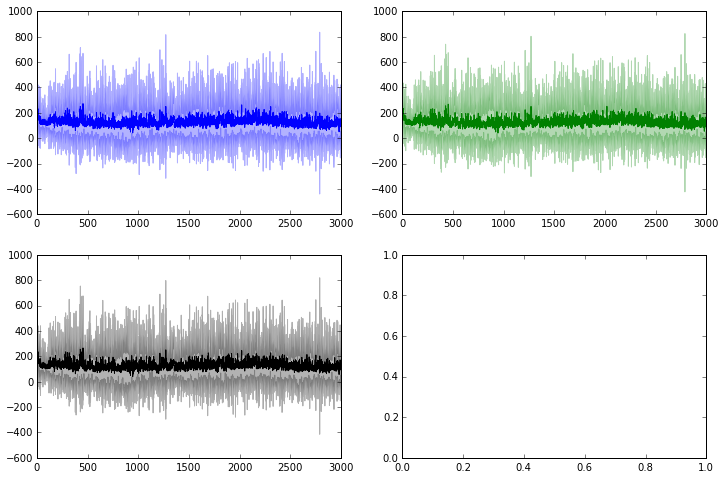

In [31]:
mean_rew = np.mean(rewards,axis=1) #average reward
err_rew = stats.sem(rewards,axis=1) #standard error of mean

mean_rew_sm = smoothing(mean_rew, 100, 0)
err_rew_sm = smoothing(err_rew, 100, 0)


f, ((ax1, ax2), (ax3, _)) = plt.subplots(2, 2)
#f.figsize((12,8))
f.set_size_inches(12, 8)
axes = [ax1, ax2, ax3]
colors = ['blue', 'green', 'black']
for exp_idx in range(num_exps):
    print mean_rew_sm[exp_idx,:10]
    
    color = colors[exp_idx]
    ax = axes[exp_idx]
    ax.plot(mean_rew_sm[exp_idx], color=color)
    ax.fill_between(np.arange(numep),(mean_rew_sm[exp_idx]-t*err_rew_sm[exp_idx]),
                     (mean_rew_sm[exp_idx]+t*err_rew_sm[exp_idx]),alpha=0.3,color=color)
